In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from keras.utils import to_categorical
from keras import utils as np_utils
from sklearn.metrics import accuracy_score

In [2]:
path = 'C:\\Users\\Medhaja\\Desktop\\Activity Recognition from Single Chest-Mounted Accelerometer\\'
l = []
for file in [f for f in os.listdir(path) if '.csv' in f]:
    fname = file.split('_')[0]
    l.append(pd.read_csv(path+file, header=None, engine='python'))#.iloc[[0, 2], :].assign(name=fname))
    df = pd.concat(l)
df = df.drop(df.columns[0], axis=1)


DataFrame Shape : (1926896, 4)

Number of rows : 1926896

Number of columns : 4


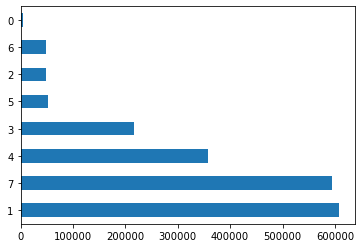

In [3]:
shape = df.shape
print('\nDataFrame Shape :', shape)
print('\nNumber of rows :', shape[0])
print('\nNumber of columns :', shape[1])
df[4].value_counts().plot(kind='barh')

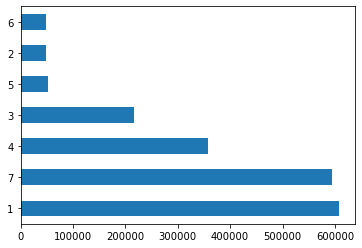

In [4]:
f = df [df[4]!=0] # Remove the rows with 0 as the catagory

# make sure that 0th catagory isn't there
f[4].value_counts().plot(kind='barh')

# Combine 3 and 7 as one catagory and Combine 4 and 6 as one catagory

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


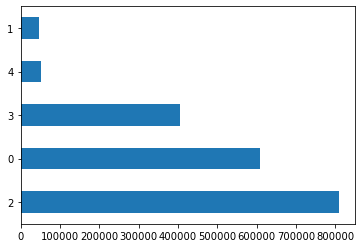

In [5]:
f[4].replace([7], 3, inplace=True) 
f[4].replace([6],4, inplace=True)

# Rename all the activities as its should start from 0th index not 1th index . eg : value -1
f[4].replace([1], 0, inplace=True)
f[4].replace([2], 1, inplace=True)
f[4].replace([3], 2, inplace=True)
f[4].replace([4], 3, inplace=True)
f[4].replace([5], 4, inplace=True)
f[4].value_counts().plot(kind='barh')

# give the columbs name
f.columns =['a', 'b', 'c', 'Class']

In [6]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(f, test_size=0.2)
train_df, val_df = train_test_split(f, test_size=0.2)

# seperate the labels and data
train_labels = np.array(train_df.pop('Class'))
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

# convert to numpy
train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

# transformation 
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (1538541,)
Validation labels shape: (384636,)
Test labels shape: (384636,)
Training features shape: (1538541, 3)
Validation features shape: (384636, 3)
Test features shape: (384636, 3)


In [7]:
# Convert the labels to one hot vectors
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
# test_labels = to_categorical(test_labels)

# Define early stoping criterias
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_categorical_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [8]:
model = keras.Sequential()
model.add(keras.layers.Dense(32, input_dim=3, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(5, activation='sigmoid'))
model.compile(loss='CategoricalCrossentropy', optimizer =keras.optimizers.Adam(1e-3), metrics=[keras.metrics.CategoricalAccuracy()])
model.fit(train_features, train_labels, epochs=15, callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/15
48080/48080 [==============================] - 64s 1ms/step - loss: 0.7820 - categorical_accuracy: 0.7309 - val_loss: 0.7375 - val_categorical_accuracy: 0.7476
Epoch 2/15
48080/48080 [==============================] - 62s 1ms/step - loss: 0.7196 - categorical_accuracy: 0.7554 - val_loss: 0.7039 - val_categorical_accuracy: 0.7598
Epoch 3/15
48080/48080 [==============================] - 62s 1ms/step - loss: 0.7081 - categorical_accuracy: 0.7589 - val_loss: 0.6993 - val_categorical_accuracy: 0.7622
Epoch 4/15
48080/48080 [==============================] - 62s 1ms/step - loss: 0.7020 - categorical_accuracy: 0.7610 - val_loss: 0.7000 - val_categorical_accuracy: 0.7598
Epoch 5/15
48080/48080 [==============================] - 63s 1ms/step - loss: 0.6982 - categorical_accuracy: 0.7621 - val_loss: 0.6927 - val_categorical_accuracy: 0.7667
Epoch 6/15
48080/48080 [==============================] - 64s 1ms/step - loss: 0.6945 - categorical_accuracy: 0.7632 - val_loss: 0.6906 - val_cat

In [9]:
# tl = to_categorical(test_labels)
# _ = model.evaluate(test_features,tl)

In [10]:
preds_classes = model.predict_classes(test_features)
array = confusion_matrix(test_labels, preds_classes)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [11]:
preds_classes

array([2, 0, 3, ..., 2, 2, 2], dtype=int64)

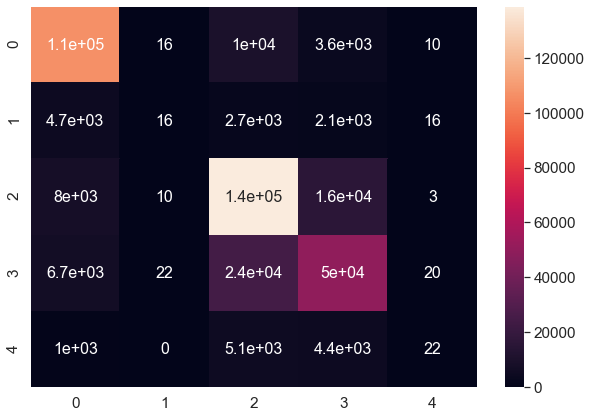

In [12]:
import seaborn as sn
df_cm = pd.DataFrame(array, range(5), range(5))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

In [13]:
acc = accuracy_score(test_labels, preds_classes)
print("Accuracy is ",acc )

Accuracy is  0.7692571678158051
